# ***Дипломный проект на тему: "Анализ заработных плат сотрудников в Сан- Франциско (поиск инсайов, составление рекомендаций стейкхолдерам)"***

---

In [1]:
# Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [16]:
#  загрузка датасета
total = pd.read_csv('Total.csv', error_bad_lines=False)  # Откроем датасет
total.head()


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [17]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


Датасет содержит данные по заработной плате, но поля содержат нечисловые данные,  очистим данннные от нечисловых значений

In [18]:
total['OvertimePay'] = pd.to_numeric(total['OvertimePay'], errors='coerce')
total['OtherPay'] = pd.to_numeric(total['OtherPay'], errors='coerce')
total['BasePay'] = pd.to_numeric(total['BasePay'], errors='coerce')
total['Benefits'] = pd.to_numeric(total['Benefits'], errors='coerce')
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312881 non-null  float64
 4   OtherPay          312881 non-null  float64
 5   Benefits          276722 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


Получили очищеный датасет. В поле Benefit было удалено порядка 40 000 записей, содержащих текст 'Not provided'- данные не представлены. 
Поле 'BasePay' потеряло около 600 данных. 
В остальных полях были некорректными по 1 записи. 
Оставим некооректные и не предоставленные данные как неопределенные, чтобы не получить ложных результатов
Посмотрим описание датасета, его основные характеристики

In [19]:
total.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312276.000000,312881.000000,312881.000000,276722.000000,312882.000000,312882.000000,312882.000000
mean,69808.257496,5668.929393,3460.694974,25016.917292,78802.645788,100928.339777,2014.625303
std,45376.929428,12745.655309,7387.263120,15089.077103,53230.758542,66485.186495,2.290899
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2011.000000
25%,35722.365000,0.000000,0.000000,12729.762500,38803.000000,48955.072500,2013.000000
50%,67710.450000,0.000000,728.000000,28327.330000,74908.790000,100011.290000,2015.000000
75%,99312.302500,5223.120000,3958.680000,35268.162500,111386.897500,142376.300000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


Данные по зарплате содержат как положительнве, так и отрицательные значения. 

In [12]:
# Дисперсия 
total.var()

<ipython-input-12-9441d406ca6e>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total.var()


BasePay             2.059066e+09
OvertimePay         1.624517e+08
OtherPay            5.457166e+07
Benefits            2.276802e+08
TotalPay            2.833514e+09
TotalPayBenefits    4.420280e+09
Year                5.248219e+00
dtype: float64

In [11]:
#  медиана
total.median()

<ipython-input-11-be12d53b9eb8>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total.median()


BasePay              67710.45
OvertimePay              0.00
OtherPay               728.00
Benefits             28327.33
TotalPay             74908.79
TotalPayBenefits    100011.29
Year                  2015.00
dtype: float64

In [13]:
#стандартное отклонение
total.std()

<ipython-input-13-0f13577d44b5>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total.std()


BasePay             45376.929428
OvertimePay         12745.655309
OtherPay             7387.263120
Benefits            15089.077103
TotalPay            53230.758542
TotalPayBenefits    66485.186495
Year                    2.290899
dtype: float64

In [14]:
# размах – разница между минимальным и максимальным значением
totalpay_range = total['TotalPay'].max() - total['TotalPay'].min()
basepay_range = total['BasePay'].max() - total['BasePay'].min()
print('Размах общей зарплаты ', totalpay_range)
print('Размах основных выплат ', basepay_range)

Размах общей зарплаты  593012.47
Размах основных выплат  592868.74


In [15]:
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline



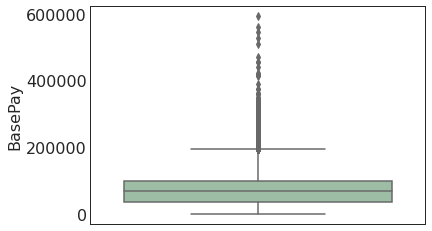

In [16]:
import seaborn as sns
ax=sns.boxplot(y='BasePay', data=total, color='#99c2a2')

Визуализируем и посмотрим распределения по всем полям с заработными платами

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


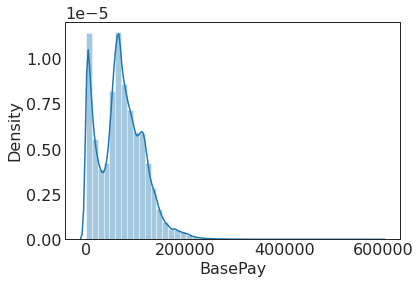

In [17]:
sns_plot = sns.distplot(total['BasePay'])
fig = sns_plot.get_figure()


Benefits


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


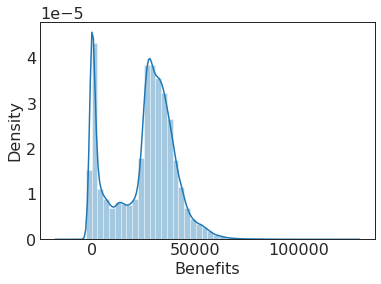

In [18]:
print('Benefits')
sns_plot = sns.distplot(total['Benefits'])
fig = sns_plot.get_figure()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


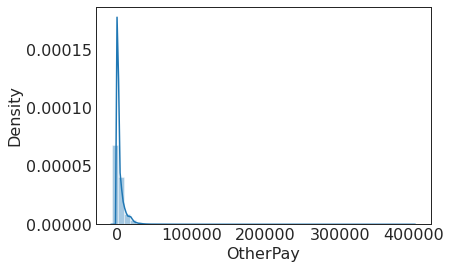

In [19]:
sns_plot = sns.distplot(total['OtherPay'])
fig = sns_plot.get_figure()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


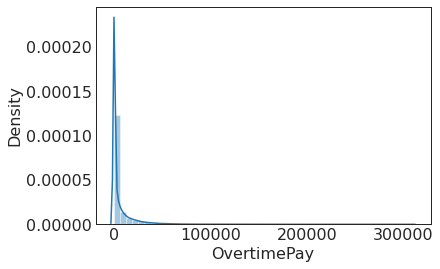

In [20]:
sns_plot = sns.distplot(total['OvertimePay'])
fig = sns_plot.get_figure()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


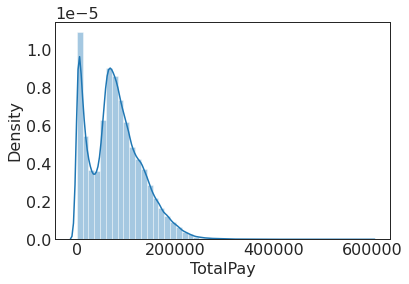

In [ ]:
sns_plot = sns.distplot(total['TotalPay'])
fig = sns_plot.get_figure()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


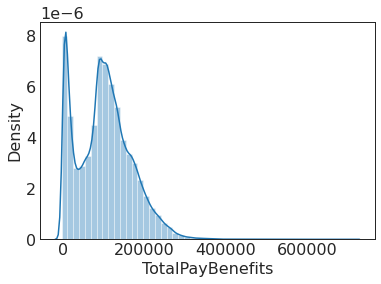

In [21]:
sns_plot = sns.distplot(total['TotalPayBenefits'])
fig = sns_plot.get_figure()

посмотрим все виды оплат на одном графике

In [ ]:
df = total[['BasePay', 'Benefits', 'OtherPay', 'OvertimePay', 'TotalPay', 'TotalPayBenefits']]

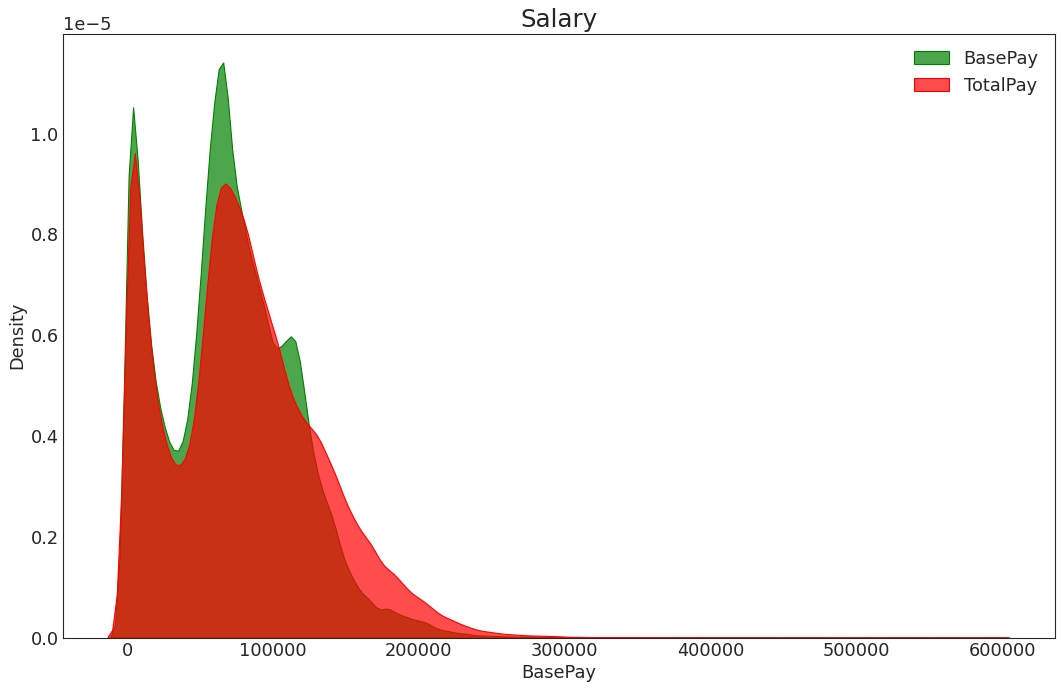

In [ ]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df["BasePay"], shade=True, color="g", label="BasePay", alpha=.7)
#sns.kdeplot(df['Benefits'], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
#sns.kdeplot(df['OtherPay'], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
#sns.kdeplot(df['OvertimePay'], shade=True, color="orange", label="OvertimePay", alpha=.7)
sns.kdeplot(df['TotalPay'], shade=True, color="r", label="TotalPay", alpha=.7)

# Decoration
plt.title('Salary', fontsize=22)
plt.legend()
plt.show()

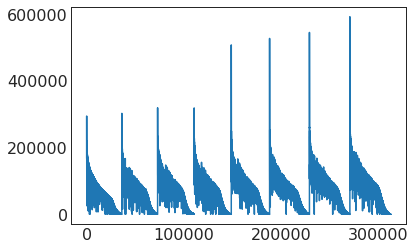

In [ ]:
df['BasePay'].plot()

In [ ]:
df

,BasePay,Benefits,OtherPay,OvertimePay
0,167411.18,NaN,400184.25,0.00
1,155966.02,NaN,137811.38,245131.88
2,212739.13,NaN,16452.60,106088.18
3,77916.00,NaN,198306.90,56120.71
4,134401.60,NaN,182234.59,9737.00
...,...,...,...,...
312877,0.00,0.0,0.00,0.00
312878,0.00,0.0,0.00,0.00
312879,0.00,0.0,0.00,0.00
312880,0.00,0.0,0.00,0.00


Сделаем группировку по профессиям

In [33]:
pf = total[['JobTitle', 'BasePay', 'Benefits', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']].groupby('JobTitle').mean().reset_index()
pf.head()

,JobTitle,BasePay,Benefits,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,ACCOUNT CLERK,43300.806506,NaN,373.200843,361.656988,44035.664337,44035.664337
1,ACCOUNTANT,46643.172000,NaN,0.000000,786.096000,47429.268000,47429.268000
2,ACCOUNTANT INTERN,28732.663958,NaN,24.430625,274.648333,29031.742917,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",150725.422000,36865.472,0.000000,0.000000,150725.422000,187590.894000
4,ACUPUNCTURIST,66374.400000,NaN,0.000000,1220.000000,67594.400000,67594.400000


мы можем получить списки самыx  высокооплачиваемых профессий в Сан-Франциско и самых низкооплачиваемых

In [46]:
pdl = pf[['JobTitle', 'TotalPayBenefits']].nlargest(10, 'TotalPayBenefits')
pds = pf[['JobTitle', 'TotalPayBenefits']].nsmallest(10, 'TotalPayBenefits')
print (' Топ 10 самых высоких заработных плат')
pdl

 Топ 10 самых высоких заработных плат


,JobTitle,TotalPayBenefits
501,Chief Investment Officer,611728.638000
1538,"Physician Administrator, DPH",454471.806667
1267,Managing Director,438767.559091
510,"Chief, Fire Department",417767.857143
881,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
888,"Gen Mgr, Public Trnsp Dept",389126.942857
202,Assistant Chief of Police,387003.872500
136,"Administrator, DPH",374311.562857
668,Dept Head V,365736.799048
509,Chief of Police,360199.826667


In [47]:
print('Самые низкие заработные платы ')
pds

Самые низкие заработные платы 


,JobTitle,TotalPayBenefits
1347,Not provided,0.000000
1489,PUBLIC SAFETY COMMUNICATIONS TECHNICIAN,149.510000
277,"BOARD/COMMISSION MEMBER, GROUP II",296.511628
1889,Security-Campus,347.190000
278,"BOARD/COMMISSION MEMBER, GROUP III",638.787879
1822,SPECIAL ASSISTANT XIV,673.800000
297,"BdComm Mbr, Grp3,M=$50/Mtg",973.106034
279,"BOARD/COMMISSION MEMBER, GROUP V",1195.904464
1827,SPECIAL EXAMINER,1201.260000
295,"BdComm Mbr, Grp2,M=$25/Mtg",1268.701970


Можно сделать анализ рост заработных плат по годам


In [22]:
yf = total[['Year', 'BasePay', 'Benefits', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']].groupby('Year').mean().reset_index()
yf

,Year,BasePay,Benefits,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,2011,63595.956517,NaN,4531.065429,3617.081926,71744.103871,71744.103871
1,2012,65436.406857,26439.966967,5023.417824,3653.437583,74113.262265,100553.229232
2,2013,69630.030216,23829.076572,5281.641980,3819.969007,77611.443142,101440.519714
3,2014,66564.421924,24789.601756,5401.993737,3505.421251,75471.836912,100261.438668
4,2015,68776.293324,24217.640375,5606.934061,3125.042178,77508.269562,101725.909937
5,2016,71181.405996,24068.862102,6136.422376,3197.303205,80513.166356,104581.440982
6,2017,74570.581134,25434.816408,6325.774603,3338.290051,84234.645789,109669.462197
7,2018,76947.426822,26292.455190,6746.790232,3487.691270,87181.908324,113474.363514


Можнно вывести график по  средним зарплатам

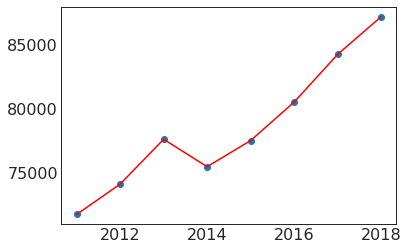

In [61]:
plt.scatter(yf['Year'], yf['TotalPay'])
plt.plot(yf['Year'], yf['TotalPay'], c='r')

Можем видеть, что в среднем по годам идет рост заработной платы
Посторим график по полю Benefits

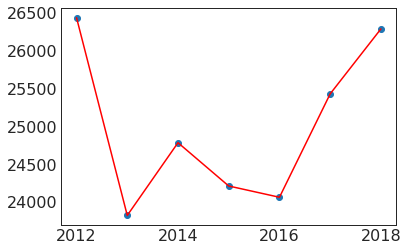

In [60]:
plt.scatter(yf['Year'], yf['Benefits'])
plt.plot(yf['Year'], yf['Benefits'], c='r')

На графике можно наблюдать, что 2013 году были минимальные вознаграждения в среднем, нет линейного роста вознаграждений по годам
Можно посторить и другие графики, посмотреть зависимости

Создадим датасет с группировкой по годам и по профессиям

In [30]:
ypd = total[['Year', 'JobTitle',  'BasePay', 'Benefits', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']].groupby(['JobTitle', 'Year']).mean().reset_index()
ypd.head()

,JobTitle,Year,BasePay,Benefits,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,ACCOUNT CLERK,2011,43300.806506,NaN,373.200843,361.656988,44035.664337,44035.664337
1,ACCOUNTANT,2011,46643.172000,NaN,0.000000,786.096000,47429.268000,47429.268000
2,ACCOUNTANT INTERN,2011,28732.663958,NaN,24.430625,274.648333,29031.742917,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",2014,62290.780000,17975.59,0.000000,0.000000,62290.780000,80266.370000
4,"ACPO,JuvP, Juv Prob (SFERS)",2015,153727.420000,40033.24,0.000000,0.000000,153727.420000,193760.660000


In [31]:
ypd.describe()

,Year,BasePay,Benefits,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
count,8172.000000,8161.000000,7126.000000,8171.000000,8171.000000,8172.000000,8172.000000
mean,2014.465614,85789.501609,29888.435569,4080.628483,3312.184771,92895.126395,118957.900731
std,2.295599,47468.983918,13028.945988,9137.851401,7108.130333,51955.950973,64187.457479
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,58260.055000,23787.566071,0.000000,173.959403,61594.849727,80803.573227
50%,2014.000000,79079.203000,29191.854020,90.300000,1026.034000,84346.710556,109289.571250
75%,2016.000000,104601.040000,35713.205714,3638.080333,3339.538137,114283.982851,146847.974316
max,2018.000000,560793.000000,125891.730000,107039.245000,200092.125000,560793.000000,680669.540000


In [ ]:
.groupby(['team', 'position']).agg({'rebounds': ['median', 'max']}). reset_index()